<a href="https://colab.research.google.com/github/miamzs2001/morbidity-prediction/blob/main/Copy_of_AutoML_H2O_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install build-essential swig
!pip install auto-sklearn==0.11.1
!pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 1,086 kB of archives.
After this operation, 5,413 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig4.0 amd64 4.0.1-5build1 [1,081 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig all 4.0.1-5build1 [5,528 B]
Fetched 1,086 kB in 1s (1,182 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
deb

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Outcome_2.csv")

In [ ]:
# install and import H2o ! pip install h2o
import h2o
# We will be using default parameter Here with H2O init method
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkd4p5n6d
  JVM stdout: /tmp/tmpkd4p5n6d/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkd4p5n6d/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_dnjaw7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
np.random.seed(10)
X=df
y=df['Outcome']
X = df.drop(['Outcome'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
# convert pandas DataFrame into H2O Frame
train_df = h2o.H2OFrame(pd.concat([X_train,y_train],axis=1))
train_df['Outcome'] = train_df['Outcome'].asfactor()
# Describe the train h20Frame
train_df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:3779
Cols:115

,MaternalDM,MaternalHT,MaternalEclamp,MaternalChorAm,MaternalAnemia,MaternalAbPlacenta,MaternalBleedPlacenta,MaternalCoredProlap,MaternalObesity,BirthDrugAtMagSulphate,BirthDrugIAntibiotic,MotherAge,MotherG,MotherP,MotherA,MaternalOtherIllness,BirthDrugAtSteroidCat,BirthWt,BirthGestation,BirthMultiplicity,Vacuum,Forcep,Apgar1Min,Apgar5Min,InitResus_O2,InitResus_CPAP,InitResus_BMV,InitResus_ETV,InitResus_CC,InitResus_Adren,BirthAdmissionTemp,RespSpt_CPAPDur,RespSpt_HFNCDur,RespSpt_ConvVentDur,RespSpt_HFOVDur,RespSpt_NitrixOxideDur,Surfactant,OtherDiagRespPH,OtherDiagRespCongenitalPneu,OtherDiagResp0socomialPneu,OtherDiagRespCommunityAcqPneu,OtherDiagRespTTN,OtherDiagRespPI,DiagRDS,DiagPneumothoraxDev,OtherDiagCardio,CVS_HeartFailure,DiagPDA,DiagPDAECHODone,DiagPDAPharmaClosure,DiagPDAPharmaClosure_Indomethacin,DiagPDAPharmaClosure_Ibuprofen,DiagPDAPharmaClosure_Paracetamol,DiagPDALigation,DiagNEC,DiagNEC_SurgicalRx,DiagNEC_Present,DiagROPStage,DiagROPStage_APROP,DiagROPDisease,DiagROPLaserTy,DiagROPAntiVEGF,DiagROPVitrectomy,DiagROPPresent,DiagIVHGrade,DiagIVHVPShunt,DiagCysticPVL,DiagCVL_Duration,DiagCLABSI,DiagInf,DiagInf1stEplConfirmSepsis_LessEqual72Hrs,DiagConfSepGpB_LessEqual72Hrs,DiagInf1stEplConfirmSepsis_More72Hrs,DiagConfSepGpB_More72Hrs,DiagConfSepStaphy_More72Hrs,DiagHIE,CSUrgency_Elective,CSUrgency_Emergency,DiagPneumothoraxDev_CMV,DiagPneumothoraxDev_CPAP,DiagPneumothoraxDev_HFV,DiagPneumothoraxDev_Spontaneous,BirthSex_Female,BirthSex_Male,BirthBabryStatus_Inborn,BirthBabryStatus_Outborn,BirthFinalModeDeliver_Other,BirthFinalModeDeliverCd_Breech,BirthFinalModeDeliverCd_SVD,BirthGrowthStatus_AGA,BirthGrowthStatus_LGA,BirthGrowthStatus_SGA,BirthPlaceBirth_v5_Enroute / During transport,BirthPlaceBirth_v5_Government Hospital with specialist,BirthPlaceBirth_v5_Government Hospital without specialist,BirthPlaceBirth_v5_Health clinic,BirthPlaceBirth_v5_Home,BirthPlaceBirth_v5_Others,BirthPlaceBirth_v5_Private hospital,BirthPlaceBirth_v5_University Hospital,PlasticWrapAtBirth_0,PlasticWrapAtBirth_1,PlasticWrapAtBirth_woDry,PtRaceID_Bumiputra Sabah,PtRaceID_Bumiputra Sarawak,PtRaceID_Chinese,PtRaceID_Indian,PtRaceID_Malay,PtRaceID_0n-citizen,PtRaceID_Orang Asli,PtRaceID_Other Malaysian,SurfactantDuration_1-2 hrs,SurfactantDuration_<1 hr,SurfactantDuration_>2 hrs,Outcome
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,real,real,real,int,int,int,int,int,int,int,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,0.3160326086956522,0.19956674790143514,0.08310847274689692,0.052603183166981385,0.176916824708751,0.03714670255720054,0.05974165769644779,0.0034955633234740524,0.13588568347263413,0.3216970998925886,0.3150281275113849,30.65239633817986,2.6025403545911625,1.3469171738555192,0.32574755226250335,0.22439798888594867,1.313166311300642,1342.5694628208553,29.6300608626621,1.174384757872454,0.0013231013495633766,0.0026462026991267533,6.5112463614712714,7.896004233924338,0.6962943071965628,0.5976363147998925,0.5472864051585169,0.5609887157442235,0.025,0.014788921753159451,35.916644614977514,7.6513627943900415,3.0127017729558165,4.734982799682457,0.9794919290817681,0.012834083090764751,0.6200052924053983,0.032812913469171735,0.11643291876157713,

In [ ]:
# code
test = pd.concat([X_test,y_test],axis=1)
test = h2o.H2OFrame(test)
# selecting feature and label columns
test['Outcome'] = test['Outcome'].asfactor()
x = test.columns
y = 'Outcome'
# remove label classvariable from feature variable
x.remove(y)
test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:945
Cols:115

,MaternalDM,MaternalHT,MaternalEclamp,MaternalChorAm,MaternalAnemia,MaternalAbPlacenta,MaternalBleedPlacenta,MaternalCoredProlap,MaternalObesity,BirthDrugAtMagSulphate,BirthDrugIAntibiotic,MotherAge,MotherG,MotherP,MotherA,MaternalOtherIllness,BirthDrugAtSteroidCat,BirthWt,BirthGestation,BirthMultiplicity,Vacuum,Forcep,Apgar1Min,Apgar5Min,InitResus_O2,InitResus_CPAP,InitResus_BMV,InitResus_ETV,InitResus_CC,InitResus_Adren,BirthAdmissionTemp,RespSpt_CPAPDur,RespSpt_HFNCDur,RespSpt_ConvVentDur,RespSpt_HFOVDur,RespSpt_NitrixOxideDur,Surfactant,OtherDiagRespPH,OtherDiagRespCongenitalPneu,OtherDiagResp0socomialPneu,OtherDiagRespCommunityAcqPneu,OtherDiagRespTTN,OtherDiagRespPI,DiagRDS,DiagPneumothoraxDev,OtherDiagCardio,CVS_HeartFailure,DiagPDA,DiagPDAECHODone,DiagPDAPharmaClosure,DiagPDAPharmaClosure_Indomethacin,DiagPDAPharmaClosure_Ibuprofen,DiagPDAPharmaClosure_Paracetamol,DiagPDALigation,DiagNEC,DiagNEC_SurgicalRx,DiagNEC_Present,DiagROPStage,DiagROPStage_APROP,DiagROPDisease,DiagROPLaserTy,DiagROPAntiVEGF,DiagROPVitrectomy,DiagROPPresent,DiagIVHGrade,DiagIVHVPShunt,DiagCysticPVL,DiagCVL_Duration,DiagCLABSI,DiagInf,DiagInf1stEplConfirmSepsis_LessEqual72Hrs,DiagConfSepGpB_LessEqual72Hrs,DiagInf1stEplConfirmSepsis_More72Hrs,DiagConfSepGpB_More72Hrs,DiagConfSepStaphy_More72Hrs,DiagHIE,CSUrgency_Elective,CSUrgency_Emergency,DiagPneumothoraxDev_CMV,DiagPneumothoraxDev_CPAP,DiagPneumothoraxDev_HFV,DiagPneumothoraxDev_Spontaneous,BirthSex_Female,BirthSex_Male,BirthBabryStatus_Inborn,BirthBabryStatus_Outborn,BirthFinalModeDeliver_Other,BirthFinalModeDeliverCd_Breech,BirthFinalModeDeliverCd_SVD,BirthGrowthStatus_AGA,BirthGrowthStatus_LGA,BirthGrowthStatus_SGA,BirthPlaceBirth_v5_Enroute / During transport,BirthPlaceBirth_v5_Government Hospital with specialist,BirthPlaceBirth_v5_Government Hospital without specialist,BirthPlaceBirth_v5_Health clinic,BirthPlaceBirth_v5_Home,BirthPlaceBirth_v5_Others,BirthPlaceBirth_v5_Private hospital,BirthPlaceBirth_v5_University Hospital,PlasticWrapAtBirth_0,PlasticWrapAtBirth_1,PlasticWrapAtBirth_woDry,PtRaceID_Bumiputra Sabah,PtRaceID_Bumiputra Sarawak,PtRaceID_Chinese,PtRaceID_Indian,PtRaceID_Malay,PtRaceID_0n-citizen,PtRaceID_Orang Asli,PtRaceID_Other Malaysian,SurfactantDuration_1-2 hrs,SurfactantDuration_<1 hr,SurfactantDuration_>2 hrs,Outcome
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,real,real,int,int,int,int,int,int,int,int,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,0.0,0.0,0.0,445.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,0.3319011815252417,0.1933404940923738,0.0811965811965812,0.05549626467449306,0.17761033369214208,0.026680896478121666,0.064034151547492,0.005330490405117271,0.11846318036286019,0.2891046386192017,0.3090128755364807,30.810085836909863,2.697354497354503,1.4571428571428575,0.3280423280423279,0.2021164021164021,1.296691568836713,1350.6920634920652,29.67407407407409,1.1576719576719574,0.0010582010582010583,0.0021164021164021165,6.579894179894177,7.865608465608468,0.6890308839190629,0.5793397231096912,0.5613660618996799,0.582089552238806,0.019189765458422176,0.007470651013874066,35.924550264550284,6.911640211640217,2.9095238095238116,5.029100529100527,1.2470899470899472,0.020105820105820106,0.6317460317460317,0.021164021164021163,0.107936507

In [ ]:
# import autoML from H2O
from h2o.automl import H2OAutoML
# callh20automl function
aml = H2OAutoML(max_runtime_secs = 120,
				seed = 1,
				balance_classes = False,
				project_name ='Outcome'
)
# train model and record time % time
aml.train(x = x, y = y, training_frame = train_df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
# View the H2O aml leaderboard
lb = aml.leaderboard
# Print all rows instead of 10 rows
lb.head(rows = lb.nrows)


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_3_AutoML_1_20230702_234046,0.973915,0.120385,0.917114,0.102342,0.181559,0.0329637
StackedEnsemble_BestOfFamily_2_AutoML_1_20230702_234046,0.973664,0.120687,0.916788,0.0914229,0.181803,0.0330522
GBM_4_AutoML_1_20230702_234046,0.973489,0.13255,0.911545,0.0926741,0.188319,0.035464
StackedEnsemble_AllModels_1_AutoML_1_20230702_234046,0.973482,0.121317,0.916002,0.104864,0.182446,0.0332866
GBM_2_AutoML_1_20230702_234046,0.97022,0.140646,0.910691,0.097351,0.191672,0.0367381
StackedEnsemble_BestOfFamily_1_AutoML_1_20230702_234046,0.96958,0.126725,0.908537,0.094387,0.185657,0.0344687
GBM_1_AutoML_1_20230702_234046,0.969521,0.127256,0.907334,0.0902855,0.186327,0.0347178
XGBoost_2_AutoML_1_20230702_234046,0.968955,0.131657,0.902514,0.0848929,0.188288,0.0354525
XGBoost_1_AutoML_1_20230702_234046,0.968812,0.136818,0.894721,0.10459,0.194817,0.0379536
GBM_3_AutoML_1_20230702_234046,0.968055,0.153059,0.895667,0.12121,0.199784,0.0399136


In [ ]:
# retrieve the leader model
leader_model = aml.leader

# retrieve the model performance
perf = leader_model.model_performance(test)

# get the confusion matrix
confusion_matrix = perf.confusion_matrix()
print(confusion_matrix)

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4411708397023741
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      801  12   0.0148   (12.0/813.0)
1      12   120  0.0909   (12.0/132.0)
Total  813  132  0.0254   (24.0/945.0)


In [ ]:
cm = confusion_matrix.to_list()
cm

[[801, 12], [12, 120]]

In [ ]:
tp = cm[1][1]
tn = cm[0][0]
fp = cm[1][0]
fn = cm[0][1]

In [ ]:
#Accuracy
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.9746031746031746

In [ ]:
#Precision
precision = tp/(tp+fp)
precision

0.9090909090909091

In [ ]:
#Recall
recall = tp/(tp+fn)
recall

0.9090909090909091

In [ ]:
#F1-Score
f1 = (2*precision*recall)/(precision+recall)
f1

0.9090909090909091

In [ ]:
#NPV
npv = tn/(tn+fn)
npv

0.985239852398524

In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_BestOfFamily" in mid][0])

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])
metalearner.coef()
df_coef = pd.DataFrame(list(metalearner.coef().values()), columns=['coef'], index=metalearner.coef().keys())
df_coef

/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:926: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


,coef
Intercept,0.509970
GBM_4_AutoML_1_20230702_234046,0.674334
XGBoost_2_AutoML_1_20230702_234046,0.357877
DRF_1_AutoML_1_20230702_234046,0.010943
GLM_1_AutoML_1_20230702_234046,0.120814
XRT_1_AutoML_1_20230702_234046,0.001949
DeepLearning_1_AutoML_1_20230702_234046,0.007456


In [ ]:
models = [tmp for tmp in metalearner.coef().keys()]
models

# Get the feature importance from each model
var_imp = pd.DataFrame(columns=X.columns, index=metalearner.coef().keys())
var_imp.loc['Intercept'] = 0

for tmp_m in models[1:]:
  # print(tmp_m)
  m = h2o.get_model(tmp_m)

  for col in m.varimp(use_pandas=True)['variable']:
    # print(col)
    df = m.varimp(use_pandas=True)
    tmp = df[df['variable']==col]['scaled_importance'].values
    # print(type(tmp))
    var_imp.loc[tmp_m, col] = tmp[0]
    # print(var_imp.loc[models[1], col])

var_imp

,MaternalDM,MaternalHT,MaternalEclamp,MaternalChorAm,MaternalAnemia,MaternalAbPlacenta,MaternalBleedPlacenta,MaternalCoredProlap,MaternalObesity,BirthDrugAtMagSulphate,...,PtRaceID_Other Malaysian,SurfactantDuration_1-2 hrs,SurfactantDuration_<1 hr,SurfactantDuration_>2 hrs,DiagPneumothoraxDev.nan,DiagPneumothoraxDev.3.0,DiagPneumothoraxDev.4.0,DiagPneumothoraxDev.2.0,DiagPneumothoraxDev.1.0,DiagPneumothoraxDev.missing(NA)
Intercept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
GBM_4_AutoML_1_20230702_234046,0.00426,0.000579,0.00068,0.000986,0.002853,0.000182,0.000768,0.000219,0.000103,0.003837,...,0.0,0.003392,0.003796,0.00041,NaN,NaN,NaN,NaN,NaN,NaN
XGBoost_2_AutoML_1_20230702_234046,0.004791,NaN,NaN,NaN,0.003628,NaN,NaN,NaN,NaN,0.001269,...,NaN,0.003121,0.007569,NaN,0.005077,NaN,NaN,NaN,NaN,NaN
DRF_1_AutoML_1_20230702_234046,0.031297,0.033391,0.02017,0.02354,0.030308,0.012668,0.014497,0.003158,0.030539,0.041345,...,0.004695,0.03068,0.044948,0.010454,NaN,NaN,NaN,NaN,NaN,NaN
GLM_1_AutoML_1_20230702_234046,0.036844,0.008487,0.174251,0.1159,0.090057,0.082949,0.039133,0.034398,0.07471,0.05362,...,0.061054,0.063688,0.00091,0.042714,0.039965,0.019318,0.009184,0.008666,0.001175,NaN
XRT_1_AutoML_1_20230702_234046,0.015118,0.009948,0.00504,0.00024,0.012848,0.001576,0.0,0.003052,0.011005,0.015032,...,0.0,0.005036,0.000831,0.000637,NaN,NaN,NaN,NaN,NaN,NaN
DeepLearning_1_AutoML_1_20230702_234046,0.667075,0.675617,0.583134,0.765753,0.509203,0.481735,0.719871,0.737442,0.54909,0.608161,...,0.413218,0.406477,0.558082,0.759223,0.737635,0.379534,0.717440,0.606293,0.597307,0.0


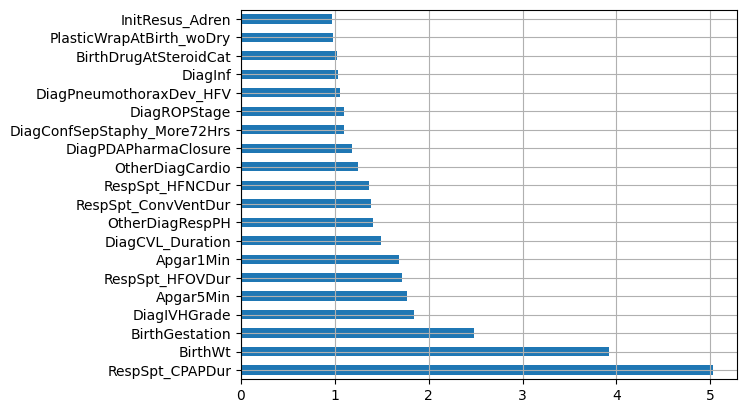

In [ ]:
var_imp['coef']= df_coef
var_imp.multiply(var_imp['coef'], axis='index')
# var_imp
var_imp_total = var_imp.sum(axis=0)[:-1]
var_imp_total.sort_values(ascending=False)[:20].plot.barh().grid()

In [ ]:
pred = leader_model.predict(test)
pred

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.371667,0.628333
0,0.971762,0.0282379
0,0.984837,0.0151627
0,0.992956,0.00704405
0,0.993099,0.00690082
1,0.408105,0.591895
0,0.994189,0.00581137
0,0.994129,0.00587066
0,0.994868,0.00513194
0,0.984649,0.0153508


In [ ]:
class_predict_counts = pred['predict'].table()
class_predict_counts.show()

predict,Count
0,816
1,129


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_path = h2o.save_model(model=leader_model, path="/content/drive/MyDrive/Colab Notebooks", force=True)
print(model_path)

/content/drive/MyDrive/Colab Notebooks/StackedEnsemble_AllModels_3_AutoML_1_20230618_155651
